## Importing dataset via FRED API

In [3]:
"""
FRED API structure: 
Sources - data sources
Releases - release of data from a source
Series (time series)
Series observation values
Categories
Tags

Have to iterate down the structure to get the information that we need - of note, this seems to be easier to do in R.

Need to acquire sources as JSON and then iterate through them to get Source ID
Can use source IDs to get release IDs
"""

'\nFRED API structure: \nSources - data sources\nReleases - release of data from a source\nSeries (time series)\nSeries observation values\nCategories\nTags\n\nHave to iterate down the structure to get the information that we need - of note, this seems to be easier to do in R.\n\nNeed to acquire sources as JSON and then iterate through them to get Source ID\nCan use source IDs to get release IDs\n'

In [4]:
!pip install requests

In [5]:
"""
API endpoint allows us to get all sources, which we iterate through as JSON data to get source ID.
response.get here is allowing us to look through api.stlouisfed.org/fred/sources through the API key to get them.
"""

import requests

api_key = '53e11b362180e1c2aecf8243e44ddc7a'

endpoint_sources = 'https://api.stlouisfed.org/fred/sources'

params_sources = {
'api_key': api_key,
'file_type': 'json'
            }

response_sources = requests.get(endpoint_sources,params=params_sources)

## Specific Navigation and Manipulation for Layoff Data

In [6]:
"""
Iterates through sources to get release IDs. In this instance using source ID of 22 but could be another number.
Using the source ID to make a request to the release endpoint on that source ID. Iterate through response JSON and 
get release IDs from each result.
"""

endpoint_release = 'https://api.stlouisfed.org/fred/source/releases'

source_id = 22

params_releases = {
'source_id': source_id,
'api_key': api_key,
'file_type': 'json'
            }

response_releases = requests.get(endpoint_release,params=params_releases)

In [7]:
"""
Get all series for release
"""

endpoint_series = 'https://api.stlouisfed.org/fred/release/series'

release_id = 192

params_release = {
'release_id': release_id,
'api_key': api_key,
'file_type': 'json'
            }

response_series = requests.get(endpoint_series,params=params_release)

In [8]:
import pandas as pd
import json

In [9]:
"""
Get specific series, in this instance expected spike around 2020 due to COVID19.
"""

endpoint_id = 'https://api.stlouisfed.org/fred/series/observations'

series_id = 'JTS1000LDL'

params_series = {
'series_id': series_id,
'api_key': api_key,
'file_type': 'json',
'limit': 100000
            }

response_specific_series = requests.get(endpoint_id,params=params_series)

In [10]:
# pd.DataFrame.from_dict(json.loads(response_specific_series.content))

In [11]:
#load specific series as json
json_load_dict = json.loads(response_specific_series.content)

In [12]:
json_load_dict.keys()

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])

In [13]:
#pull specifically the observations values from a specific observation
obs = json_load_dict['observations']
obs[3]

{'realtime_start': '2022-11-09',
 'realtime_end': '2022-11-09',
 'date': '2001-03-01',
 'value': '2033'}

In [14]:
# Append dates and number of unemployment to lists, combine in Dataframe

dates = []
unemployed_number = []

for i in range(len(obs)):
    dates.append(obs[i]['date'])
    unemployed_number.append(obs[i]['value'])

In [15]:
# Convering lists to dataframes and then concatenating (layoff counts)
df_dates = pd.DataFrame(dates)
df_unemployed = pd.DataFrame(unemployed_number)

df_layoffs = pd.concat([df_dates, df_unemployed], ignore_index=True, sort=False, axis = 1)
df_layoffs = df_layoffs.rename(columns = {0:'Dates', 1: 'Layoff_Count'})

## Acquiring demographic data for College Graduates - Bachelor's Degree, 16 years and over, Women

In [16]:
"""
We can anticipate spikes in this data around times of recession, as reskilling rates are known to increase during
recessions.
"""

'\nWe can anticipate spikes in this data around times of recession, as reskilling rates are known to increase during\nrecessions.\n'

In [17]:
endpoint_release = 'https://api.stlouisfed.org/fred/source/releases'

source_id = 22

params_releases2 = {
'source_id': source_id,
'api_key': api_key,
'file_type': 'json'
            }

response_releases = requests.get(endpoint_release,params=params_releases)

In [18]:
endpoint_series = 'https://api.stlouisfed.org/fred/release/series'

release_id = 50

params_release2 = {
'release_id': release_id,
'api_key': api_key,
'file_type': 'json'
            }

response_series = requests.get(endpoint_series,params=params_release2)

In [19]:
endpoint_id2 = 'https://api.stlouisfed.org/fred/series/observations'

series_id2 = 'CGBDLW16O'

params2 = {
'series_id': series_id2,
'api_key': api_key,
'file_type': 'json',
'limit': 100000
            }

response_specific_series2 = requests.get(endpoint_id2,params=params2)

In [20]:
json_load_dict2 = json.loads(response_specific_series2.content)

In [21]:
json_load_dict2.keys()

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])

In [22]:
obs2 = json_load_dict2['observations']
obs2[3]

{'realtime_start': '2022-11-09',
 'realtime_end': '2022-11-09',
 'date': '2000-04-01',
 'value': '12262'}

In [23]:
dates2 = []
educated_women_employed = []

for i in range(len(obs2)):
    dates2.append(obs2[i]['date'])
    educated_women_employed.append(obs2[i]['value'])

In [24]:
# create dataframa for educated women counts
df_dates2 = pd.DataFrame(dates2)
df_educated_women_employed = pd.DataFrame(educated_women_employed)

df_educated_women = pd.concat([df_dates2, df_educated_women_employed], ignore_index=True, sort=False, axis = 1)
df_educated_women = df_educated_women.rename(columns = {0:'dates_women', 1: 'educated_women_employed'})

## Demographic Data for College Graduates - Bachelor's Degree, 25 to 34 years

In [25]:
"""
We can also anticipate spikes in this data around times of recession, as reskilling rates are known to increase during
recessions.
"""

'\nWe can also anticipate spikes in this data around times of recession, as reskilling rates are known to increase during\nrecessions.\n'

In [26]:
endpoint_release = 'https://api.stlouisfed.org/fred/source/releases'

source_id = 22

params_releases = {
'source_id': source_id,
'api_key': api_key,
'file_type': 'json'
            }

response_releases = requests.get(endpoint_release,params=params_releases)

In [27]:
endpoint_series = 'https://api.stlouisfed.org/fred/release/series'

release_id = 50

params_release2 = {
'release_id': release_id,
'api_key': api_key,
'file_type': 'json'
            }

response_series = requests.get(endpoint_series,params=params_release2)

In [28]:
endpoint_id2 = 'https://api.stlouisfed.org/fred/series/observations'

series_id3 = 'CGBDL2534'

params2 = {
'series_id': series_id3,
'api_key': api_key,
'file_type': 'json',
'limit': 100000
            }

response_specific_series3 = requests.get(endpoint_id2,params=params2)

In [29]:
json_load_dict3 = json.loads(response_specific_series3.content)

In [30]:
obs3 = json_load_dict3['observations']
obs3[3]

{'realtime_start': '2022-11-09',
 'realtime_end': '2022-11-09',
 'date': '2000-04-01',
 'value': '7813'}

In [31]:
dates3 = []
educated_employed_older = []

for i in range(len(obs3)):
    dates3.append(obs3[i]['date'])
    educated_employed_older.append(obs3[i]['value'])

In [32]:
#create dataframe for educated mature students (25-34 yrs)
df_dates3 = pd.DataFrame(dates3)
df_educated_employed_older = pd.DataFrame(educated_employed_older)

df_educated_older = pd.concat([df_dates3, df_educated_employed_older], ignore_index=True, sort=False, axis = 1)
df_educated_older = df_educated_older.rename(columns = {0:'dates_older', 1: 'educated_employed_older_count'})

## Concat Layoff, Educated Women and Mature Educated DataFrames 

In [33]:
df_layoffvseducation = pd.concat([df_layoffs, df_educated_women, df_educated_older],ignore_index=True, sort=False, axis = 1)
df_layoffvseducation

,0,1,2,3,4,5
0,2000-12-01,1908,2000-01-01,12069,2000-01-01,7820
1,2001-01-01,2126,2000-02-01,12169,2000-02-01,7810
2,2001-02-01,1756,2000-03-01,12144,2000-03-01,7767
3,2001-03-01,2033,2000-04-01,12262,2000-04-01,7813
4,2001-04-01,1791,2000-05-01,12233,2000-05-01,7542
...,...,...,...,...,...,...
269,NaN,NaN,2022-06-01,20179,2022-06-01,11246
270,NaN,NaN,2022-07-01,20826,2022-07-01,11145
271,NaN,NaN,2022-08-01,20965,2022-08-01,11202
272,NaN,NaN,2022-09-01,20438,2022-09-01,11033


In [34]:
#dropping na values, renaming columns
df_layoffvseducationcopy = df_layoffvseducation.dropna()
df_layoffvseducationcopy = df_layoffvseducationcopy.rename(columns = {0:'dates_layoffs', 1: 'layoff_count', 
                                                                      2: 'dates_women', 3: 'women_count', 
                                                                      4: 'dates_older', 5: 'older_count'})
# dropping dates from the DF as datetime adds additional complexity which I do not have time to explore
# on a solo project, assessing interaction purely between counts. 
df_layoffvseducation_nodates = df_layoffvseducationcopy.drop(['dates_layoffs', 'dates_women', 'dates_older'], axis =1)

#discovered outliers at 231 and 232, dropping them to visualize effect on the plot
df_layoffvseducation_nodates = df_layoffvseducation_nodates.drop([231,232], axis = 0)

df_layoffvseducation_withdates = df_layoffvseducationcopy

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaled_df = StandardScaler().fit_transform(df_layoffvseducation_nodates)
#Standardize features by removing the mean and scaling to unit variance.

#tried out PCA to see if it would assist with plotting, did not in this instance.
# pca = PCA(2)
# scaled_df = pca.fit_transform(df_layoffvseducation_nodates)

scaled_df

#negative values are expected here as StandardScaler removes the mean, which can alter some values to be negative.

array([[ 0.70849167, -1.5856712 , -0.85400711],
       [ 1.74940273, -1.54507698, -0.86222075],
       [-0.01728118, -1.55522553, -0.89753941],
       [ 1.30534434, -1.50732435, -0.85975666],
       [ 0.14983757, -1.51909668, -1.08234636],
       [ 0.83263703, -1.5414235 , -1.11027274],
       [ 0.79921328, -1.51828479, -0.90903851],
       [ 0.94245792, -1.53005712, -1.01827995],
       [ 0.65119381, -1.50448276, -1.00842358],
       [ 1.2719206 , -1.49961145, -1.06016952],
       [ 2.19346112, -1.59013656, -0.93696489],
       [ 2.02156755, -1.51747291, -0.94846399],
       [ 0.37902899, -1.47769057, -0.95914173],
       [ 0.27875775, -1.45292809, -0.84579347],
       [ 0.59867078, -1.35834356, -0.95339218],
       [ 0.14983757, -1.3847298 , -0.94435717],
       [ 0.45065132, -1.39041299, -1.03881405],
       [ 0.52704846, -1.52762146, -1.02895768],
       [ 0.79443846, -1.53574031, -1.1546264 ],
       [ 0.99975578, -1.57998801, -1.26140375],
       [ 0.29308221, -1.45942317, -1.211

## Clustering the data

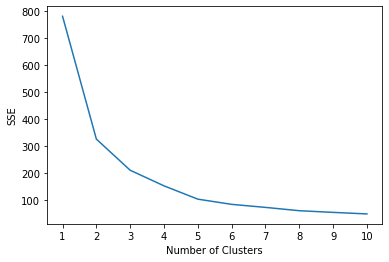

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results in order to assess bends in 
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# there are bends at 2 clusters and smaller ones at 3 and 5 - 
# going to choose 5 for more specificity in displaying remaining outliers.

In [37]:
#instantiate the k-means class, using optimal number of clusters found by analyzing elbow curve above
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=1, max_iter = 300, )

#fit k-means algorithm to data, assign cluster labels to a variable
labels = kmeans.fit_predict(scaled_df)

In [38]:
#add cluster labels to original dataframe for visualization purposes
df_layoffvseducation_nodates['cluster'] = kmeans.labels_

In [39]:
#get unique values for cluster labels, store in a variable for future use in plotting
unique_labels = np.unique(df_layoffvseducation_nodates['cluster'])

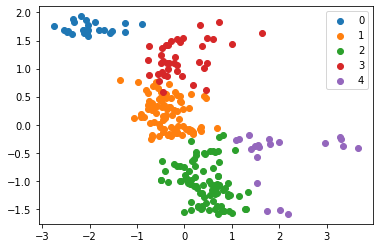

In [40]:
#plotting the results:
for i in unique_labels:
    plt.scatter(scaled_df[labels == i , 0] , scaled_df[labels == i, 1], label = i)
plt.legend()
plt.show()

In [41]:
#checking to see where cluster label = 2 because there are significant outliers there 
#which affected the scale of the initial graph
#adjusted for the 2 outliers in original df and now assessing 2 as a central cluster
#layoff mainly around 19k, women 12- a few 15k, older 7.5k-8k
#layoff counts as well as education counts all holding steady.

df_layoffvseducation_nodates.loc[df_layoffvseducation_nodates['cluster'] == 2]

,layoff_count,women_count,older_count,cluster
0,1908,12069,7820,2
2,1756,12144,7767,2
3,2033,12262,7813,2
4,1791,12233,7542,2
5,1934,12178,7508,2
...,...,...,...,...
89,1848,14753,8120,2
91,1982,14882,8153,2
106,1929,15514,8543,2
108,1914,15415,8026,2


In [42]:
#checking the 5th cluster to see why outliers may be arising here
#layoffs are consistently over 2k, many nearly 3k
#women count is up around 15k vs 12k in more central clusters such as 2
#older count closer to 8400 vs 8k
#since layoff counts are up alongside education numbers we anticipate that this is indicative of a recession,
#as retraining numbers are known to increase during recessions.
df_layoffvseducation_nodates.loc[df_layoffvseducation_nodates['cluster'] == 4]

,layoff_count,women_count,older_count,cluster
1,2126,12169,7810,4
10,2219,12058,7719,4
11,2183,12237,7705,4
51,2081,13398,7856,4
81,2079,14545,8064,4
90,2072,15054,8123,4
92,2088,14999,8248,4
93,1989,15288,8235,4
94,2137,15107,8310,4
95,2177,15195,8168,4


In [43]:
#checking the 0th cluster to see why outliers may be arising here
#layoff averaging 13k
#women averaging 20k
#older count averaging 11k
#this is interesting because while layoff numbers dip relative to other clusters, education numbers are very high. 
#this could be indicative of mid-recession education plans playing out as the economy improves? 
df_layoffvseducation_nodates.loc[df_layoffvseducation_nodates['cluster'] == 0]

,layoff_count,women_count,older_count,cluster
236,1499,20059,11215,0
237,1381,20125,10950,0
238,1442,20073,11075,0
241,1496,20439,11146,0
242,1572,20412,11425,0
243,1430,20022,11215,0
244,1311,20113,11099,0
245,1270,20619,11290,0
246,1302,20737,11543,0
247,1365,20506,11432,0
